In [1]:
import matplotlib.pyplot as plt
from osgeo import gdal, osr
import numpy as np
import matplotlib
import cartopy.crs as ccrs
import cartopy
matplotlib.use("TkCairo")
%matplotlib inline

### This code requires the above modules to be run, which I found had to be installed in a dedicated environment. 

### You can recreate the environment with gdal_env.yml

### All other code was run in my base environment, but I have checked that it also runs in the gdal_env.yml

In [5]:
# Calculate how many degrees of Longitude correspond to a km
# We need to do this to make the scale bar

# Use online calculator to calculate 
# the length of a degree of longitude in m at 58.7N

# http://www.csgnetwork.com/degreelenllavcalc.html

dlm = 57891.35

# 1000/dlm = 1000 m

km = 1000/dlm

km

0.017273737786387775

In [9]:
# Coordinates of the sea ice pits (DP) and lake ice pits (LP)

DP_lon, DP_lat= -93.800885, 58.781814
LP_lat, LP_lon = 58.737605, -93.806016

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


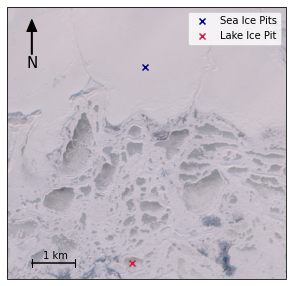

In [11]:
tiff_dir = '/home/robbie/Dropbox/dye_brine/S2_geotiff/'
tiff_f_name = '2021-12-06-00_00_2021-12-06-23_59_Sentinel-2_L2A_Highlight_Optimized_Natural_Color.tiff'

ds = gdal.Open(tiff_dir+tiff_f_name)

data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

projection = ccrs.NorthPolarStereo()
subplot_kw = dict(projection=projection)
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=subplot_kw)

extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
          gt[3] + ds.RasterYSize * gt[5], gt[3])

img = ax.imshow(data[:3, :, :].
                transpose((1, 2, 0)),
                extent=extent,
                aspect='auto',
                origin='upper')

ax.scatter([DP_lon],[DP_lat],marker='x',label='Sea Ice Pits',color='darkblue')
ax.scatter([LP_lon],[LP_lat],marker='x',label='Lake Ice Pit',color='crimson')

ax.plot([LP_lon-0.04,LP_lon-0.04+km],[LP_lat,LP_lat],marker='|',color='k',markersize=8)

ax.annotate('1 km',xy=[LP_lon-0.0355,LP_lat+0.001],xycoords='data')

arrow_length = 10
ax.annotate('N',
            xy=(LP_lon-0.04,LP_lat+0.055),
            xytext=(LP_lon-0.04,LP_lat+0.045),
            arrowprops=dict(facecolor='black',
                            width=1, headwidth=10),
            ha='center',
            va='center',
            fontsize=15,
            xycoords='data')

plt.legend()

plt.savefig('../Paper/Figures/Fig_1.jpg',dpi=500,bbox_inches='tight')
plt.savefig('/home/robbie/Dropbox/Apps/Overleaf/Dye_Brine/Fig_1.jpg',dpi=500,bbox_inches='tight')

plt.show()

In [8]:
# Now calculate the distance between the two points

# Import a custom module that converts lon/lat arrays to
# x/y arrays where x/y in meters with EASE coords.

# The ll_xy module is included with this notebook

from ll_xy import lonlat_to_xy

DPx, DPy = lonlat_to_xy([DP_lon],[DP_lat],hemisphere='n')
LPx, LPy = lonlat_to_xy([LP_lon],[LP_lat],hemisphere='n')

np.sqrt(np.square(DPy[0]-LPy[0]) + np.square(DPx[0]-LPx[0]))

4744.394509711052